Index
<ol>
    <li>Chapter 1</li>
    <li>Chapter 2</li>
</ol>

<h1> Chapter 1</h1>

<p>PyTorch - python based computational graph framework for deep learning algorithm inplementation</p>

<h2>Supervised Learning Paradigm</h2>

<img src="images/1.1.png">

- Observations:
    items we want to make predictions about (denoted as "x" referred to as inputs)
- Targets:
    labels corresponding to an observation
    what we're predicting
    denoted as y
    often called ground truth
- Model:
    mathematical expression/function
    takes value x (observation) tries to predict y (target)
- Parameters:
    often reffered to as weights
    parametrize the Model
    w or w with a hat is normally used to to denote it
- Predictions:
    often referred to as estimates
    value predicted by model
    usually denoted as y with a hat
- Loss function:
    compares y hat (predictions) with y (ground truth/targets)
    the loss value for each prediction is a scalar value
    generally, lower loss is better
    L denotes loss function

<img src="images/1.2.png">

- the formal definition of the diagram

<h2> Training using (stochastic) gradient descent</h2>

- the goal is to minimize the loss function by adjusting the Parameters
        - just like finding roots for an equation
        - gradient descent (GD) is used to find roots for an equation
        - GD is computationally expensive and takes a long amount of time
        - thus stochastic gradient descent is used (SGD)
        - subset of points are used 
            - PURE SGD is when one point is used
            - minibatch SGD is when a subset of points is used and there's more than one point
        - pure SGD is rarely used due to very slow convergence due to noisy updates
        - multiple variants of SGD explored later
        - iteravely updating parameters is called backpropagation


<h2>Observation and Target Encoding</h2>

- algorithnms do not take text as input and can only perform calculations on numbers
    - thus we turn characters, words, sentences, paragraphs, etc. into a numerical representation
    - 1.3.png
    - One-Hot Representation:
        - Indexes words in the universal set
        - use a 1 if the word is present
        - use a 0 if the word is not present
        - Consider the following lines
            Time flies like an arrow.
            Fruit flies like a banana.
        - universal set (vocab size) would yield {time, fruit, flies, like, a, an, arrow, banana}
        - binary encoding for "like a banana" would be [0, 0, 0, 1, 1, 0, 0, 1]
        - NOTE: two different meanings of flies are compressed to the same in one-hot

<h3>Term - Frequency (TF)</h3>

- sum of one hot representations of its consituent
- Term-Frequency of a word is denoted by TF(w)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = [
    'Time flies flies like an arrow.',
    'Fruit flies like a banana.'
]

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(
    one_hot,
    annot=True,
    cbar=False,
    xticklabels=[
        'an',
        'arrow',
        'banana',
        'flies',
        'fruit',
        'like',
        'time'
    ],
    yticklabels=[
        'Sentence 1',
        'Sentence 2'
    ]
)

<h3>Term Frequency Inverse Document Frequency (TF-IDF)</h3>

- When words are repeated a lot in a document they provide less unique information
- thus the IDF part of TF-IDF penalizes the weight of words that appear more often
- IDF(w) = log(N/n_w)
    where n_w is the number of docs with word w and N is total # of docs
- NOTE: more common words across docs will be closer to value 0

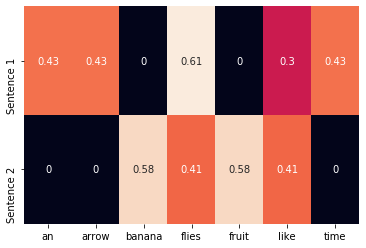

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(
    tfidf,
    annot=True,
    cbar=False,
    xticklabels=[
        'an',
        'arrow',
        'banana',
        'flies',
        'fruit',
        'like',
        'time'
    ],
    yticklabels=[
        'Sentence 1',
        'Sentence 2'
    ]
)

- it is rare to see this used since it's better to learn a representation of words
- since that way we lose less information (e.g. words with multiple meanings, how words belong to similar categores etc.)

<h3>Target Encoding</h3>

- Target variable depends on problem that is being solved
- e.g. machine translation, summarization, question answering: target is text
- in categorical, sometimes there are too many categories
    - e.g. language modeling problem (predict next word) too many words thus problem revisited later
- Numerical predictions
    - e.g. predict a restaurant rating based on a review, grading an essay
    - strategies include: binning numbers (0 - 18, 19 - 35, etc.)
    - treat as ordinal classification problem

<h2>Computational Graphs</h2>

<img src="images/1.6.png">

- Computational Graphs are a type of data structure
- abstraction model of mathematical expressions
- e.g. TensorFlow PyTorch Theano
- Computational graphs keep track of extra information for automatic differentiation to obtain gradients of parameters during training
- inference is simply expression evaluation (forward flow on a computation graph)
- Drawn as a directed acyclic graph (DAG)
    - nodes are operations
    - inputs are incoming edges
    - output is outgoing edge

<h2>PyTorch Basics</h2>

- PyTorch: optimized tensor manipulation library for deep learning
- open source, community driven deep learning framework
- uses tape-based automatic differentiation (unlike theano, caffe, and tensorflow)
    - allows user to define and execute computational graphs dynamically
    - helpful for debugging & consturcting sophisticated models with less effort

<h3>Dynamic vs Static Computational Graphs</h3>

- Static Frameworks: Theano, Caffe, Tensorflow
    - require computational graph to be, declared and compiled before execution
    - provides more efficient implementations (useful for production and mobility)
    - not really suitable for research and development
- Dynamic Frameworks: Chainer, DyNet, Pytorch
    - more flexible
    - imperative style of development (does not require compilation before execution
    - useful for NLP modelling tasks since each input could result in different graph structure

<h3>Goals:</h3>
<ul>
    <li>Create Tensors</li>
    <li>Operations with Tensors</li>
    <li>Indexing, slicing, and joining tensors</li>
    <li>Computing gradients with tensors</li>
    <li>Using CUDA tensors with GPUS</li>
</ul>

<h3>Installing PyTorch</h3>

- pytorch.org has a menu which allows users to select their system setup and returns the command that needs to be run
- e.g.

<img src='images/cmd.png'>


In [4]:
import torch

<h3>Tensor</h3>

- mathematical object holding some multi - dimensional data
- tensor of order (rank) zero is just a number (scalar)
- tensor of order (rank) one is an array of numbers (vector)
- tensor of order (rank) two is a matrix
- n dimensional array of scalars

<h4>Creating Tensors</h4>

- describe that returns
    - tensor type
    - dimension
    - contents

In [5]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

- create tensor with random contents but specified dimensions

In [6]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[7.2874e-03, 9.3607e-43, 7.2874e-03],
        [9.3607e-43, 3.7096e-03, 9.3607e-43]])


- create tensor with random values from
    - uniform distribution
    - normal distribution

In [7]:
describe(torch.rand(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.6917, 0.7362, 0.4888],
        [0.1274, 0.9771, 0.5449]])


In [8]:
describe(torch.randn(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.1667,  0.4128,  1.4983],
        [ 0.3506, -0.3451,  1.0583]])


- create tensor filled with
    - zeros
    - ones

In [9]:
describe(torch.zeros(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
describe(torch.ones(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


- create tensor filled with any scalar

In [11]:
x = torch.ones(2, 3)
x.fill_(9)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[9., 9., 9.],
        [9., 9., 9.]])


Note: Any PyTorch method with underscore (e.g. fill_()) refers to an in - place operation, it modifies content in place without creating a new object

- create tensor from python lists

In [12]:
describe(torch.Tensor([[1, 2, 3],
                        [4, 5, 6]]))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- create tensor from numpy array
    - we can also make numpy arrays with tensors

In [13]:
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.3837, 0.0963, 0.0373],
        [0.9140, 0.3486, 0.4744]], dtype=torch.float64)


<h4>Tensor Types and Sizes</h4>

- default type when using torch.Tensor(): torch.FloatTensor
- tensor types (float, long, double, etc.) can be converted 2 ways

- during initialization (2 ways to initialize)
    - calling type specific object constructor
        - e.g. torch.FloatTensor() or torch.LongTensor()
    - or passing a keyword arguement to torch.Tensor() with the torch data type
        - e.g. torch.Tensor(..., dtype=torch.int64)
-  type casting methods
    - e.g. torch.Tensor(...).double()

In [14]:
describe(torch.FloatTensor([[1, 2, 3],
                        [4, 5, 6]]))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [15]:
describe(torch.FloatTensor([[1, 2, 3],
                        [4, 5, 6]]).long())

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [16]:
describe(torch.tensor([[1, 2, 3],[4, 5, 6]], dtype=torch.int64))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [17]:
describe(torch.tensor([[1, 2, 3],[4, 5, 6]], dtype=torch.int64).float())

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


<h4>Tensor Operations</h4>

- tensors come with two methods of operation:
    - using operator symbols: +, -, *, /
    - using operator methods: .add()

In [18]:
x = torch.randn(2, 3)

In [19]:
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.8169,  0.4170,  2.1024],
        [-0.4176,  0.8028, -0.2204]])


In [20]:
describe(x + x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-3.6339,  0.8340,  4.2049],
        [-0.8352,  1.6057, -0.4408]])


In [21]:
describe(torch.add(x, x))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-3.6339,  0.8340,  4.2049],
        [-0.8352,  1.6057, -0.4408]])


- other methods
    - torch.arange(int)
        - creates a rank one tensor that starts at the 0th position and increments
    - "tensor".view(int, int)
        - reshapes a tensor to the new dimensions
    - torch.sum("tensor", dim=0)
        - sums elements in the same column
    - torch.sum("tensor", dim=1)
        - sums elements in the same row
    - torch.transpose("tensor", 0, 1)
        - transposes the tensor based on the given dimensions

In [22]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [23]:
y = x.view(2, 3)
describe(y)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [24]:
describe(torch.sum(y, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [25]:
describe(torch.sum(y, dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3, 12])


In [26]:
describe(torch.transpose(y, 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


<h4>Indexing, and Slicing</h4>

In [27]:
x = torch.arange(6).view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [28]:
describe(x[:1, :2])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])


In [29]:
describe(x[0,1])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
1


In [30]:
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])


In [31]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [32]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])


Note: Indices must be of type torch.LongTensor

<h4>Concatenation/Joining</h4>

In [33]:
x = torch.arange(6).view(2,3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [34]:
describe(torch.cat([x, x], dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [35]:
describe(torch.cat([x, x],dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [36]:
describe(torch.stack([x, x]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


<h4>Multiplication, inverse, and trace</h4>

In [37]:
x1 = x.float()
describe(x1)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [38]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [39]:
describe(torch.mm(x1, x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])


<h3>Tensors and Computational Graphs</h3>

- Tensors encapsulate (OOP paradigm which means to bundle) data, algebraic operations, indexing reshaping etc.
- when boolean flag 'requires_grad' is set to True the tensor can then keep track of gradient and gradient function
    - needed for the gradient based learning
- PyTorch logic:
    - tracks values of forward pass
    - at computation end scalar is used to compute a backward pass 
        - initiated by 'backward()' method on tensor resulting from evaluation on loss function
    - computes gradient value for each tensor object that participated in forward pass        

In [40]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [41]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [42]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


Gradients
General:
- a value that represents the slope of output with respect to input
Computational Graph specific
- gradients exist for each parameter of model
    - can be thought as contribution to final error
- '.grad' returns the gradient of a node in the computational graph

<h3>CUDA Tensors</h3>

- all tensors have been allocated on CPU
- when doing linear algebra operations, we should utilize the GPU if we have one
- to use GPU, tensor's must be GPU allocated
- CUDA API gives access to GPU
- created by NVIDIA for NVIDIA GPUs
- Torch offers CUDA tensor objects which are indistinguishable from regular CPU tensors except for how they are allocated

- in Torch it's easy to create CUDA tensors, transfer from CPU to GPU while maintaining type
- preferred way to write code is to be device agnostic, so it works whether or not it's GPU or CPU
- example
    - check if GPU is available
    - if so retrieve the GPU as a device
    - then all future tensors are moved to that device

In [43]:
print(torch.cuda.is_available())

True


In [44]:
# preferred method: dvice agnostic tenor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [45]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.4922, 0.5687, 0.2511],
        [0.5676, 0.5831, 0.4662],
        [0.9803, 0.4133, 0.0200]], device='cuda:0')


- operations between objects must be between objects on the same device
- moving data in and out of GPU is expensive
- typical procedure:
    - parallelizable computations on GPU then transfer final result to CPU
- if you have several CUDA-visible devices (multiple GPUs) use CUDA_VISIBLE_DEVICES environment variable when exectuing program
    - 'CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py'
- parallelism and multi-GPU training not covered but essential to scale and train large models
    - refer to Torch Docs and discussion forums

<h2>Exercises</h2>

1

In [46]:
one = torch.rand(3, 3)
describe(one.unsqueeze(0))
describe(torch.unsqueeze(one, 0))
describe(one[None,:,:])

Type: torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.4270, 0.5472, 0.2485],
         [0.8538, 0.4119, 0.2488],
         [0.2655, 0.2981, 0.2311]]])
Type: torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.4270, 0.5472, 0.2485],
         [0.8538, 0.4119, 0.2488],
         [0.2655, 0.2981, 0.2311]]])
Type: torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.4270, 0.5472, 0.2485],
         [0.8538, 0.4119, 0.2488],
         [0.2655, 0.2981, 0.2311]]])


2

In [47]:
describe(one.unsqueeze(0).squeeze(0))
describe(torch.squeeze(torch.unsqueeze(one, 0)))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.4270, 0.5472, 0.2485],
        [0.8538, 0.4119, 0.2488],
        [0.2655, 0.2981, 0.2311]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.4270, 0.5472, 0.2485],
        [0.8538, 0.4119, 0.2488],
        [0.2655, 0.2981, 0.2311]])


3

In [48]:
describe(4 * torch.rand(5, 3) + 3)

Type: torch.FloatTensor
Shape/size: torch.Size([5, 3])
Values: 
tensor([[6.1781, 6.7948, 3.0571],
        [6.1753, 6.4312, 3.4104],
        [4.2131, 6.5430, 3.0883],
        [3.9093, 5.2050, 3.7284],
        [6.1543, 6.9596, 4.2145]])


4

In [49]:
torch.randn(3, 3)
torch.rand(3, 3).normal_()

tensor([[-0.3456, -0.6162,  1.2007],
        [ 0.2832, -0.5967, -0.9135],
        [-0.1894,  0.1335, -1.5971]])

5

In [50]:
torch.nonzero(torch.tensor([1,1,1,0,1]))

tensor([[0],
        [1],
        [2],
        [4]])

6

In [51]:
x = torch.rand(3, 1)
x.expand(4, 3, 1)

tensor([[[0.1121],
         [0.2343],
         [0.5677]],

        [[0.1121],
         [0.2343],
         [0.5677]],

        [[0.1121],
         [0.2343],
         [0.5677]],

        [[0.1121],
         [0.2343],
         [0.5677]]])

7

In [52]:
a = torch.rand(3, 4, 5)
b = torch.rand(3, 5, 4)
describe(a)
describe(b)
describe(torch.bmm(a, b))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 4, 5])
Values: 
tensor([[[3.4373e-01, 9.1124e-01, 3.0427e-02, 9.3244e-01, 1.3437e-01],
         [1.0506e-01, 5.7745e-04, 4.6654e-01, 8.3675e-01, 8.9411e-01],
         [3.4347e-02, 6.7840e-01, 7.1323e-01, 4.7030e-01, 4.5278e-01],
         [7.1229e-01, 2.4006e-01, 9.9932e-02, 4.9990e-01, 6.4776e-01]],

        [[9.4904e-01, 5.3112e-01, 3.5220e-01, 6.9380e-02, 1.1460e-01],
         [1.6702e-01, 3.6145e-01, 5.0095e-01, 7.7478e-01, 8.7523e-01],
         [7.9318e-01, 1.7031e-01, 2.7884e-01, 3.2972e-01, 5.3384e-01],
         [3.0402e-01, 9.2304e-01, 4.8896e-01, 6.0123e-01, 6.3155e-01]],

        [[3.2810e-01, 8.9415e-01, 3.1727e-02, 8.6620e-01, 6.9496e-01],
         [3.7954e-01, 3.5068e-01, 2.6746e-01, 2.5060e-01, 9.6907e-01],
         [3.4475e-01, 6.5019e-01, 7.6002e-01, 5.1548e-01, 4.2115e-01],
         [8.6959e-01, 3.0305e-01, 2.9528e-01, 1.6845e-01, 2.0882e-02]]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 5, 4])
Values: 
tensor([

8

In [53]:
a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
describe(a)
describe(b)
describe(torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size())))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 4, 5])
Values: 
tensor([[[0.4697, 0.8817, 0.8698, 0.8761, 0.4229],
         [0.2700, 0.4112, 0.5515, 0.8236, 0.1751],
         [0.1212, 0.4974, 0.9459, 0.1721, 0.8866],
         [0.8884, 0.6462, 0.9219, 0.8386, 0.5173]],

        [[0.9776, 0.9906, 0.9792, 0.8572, 0.4516],
         [0.0498, 0.5790, 0.1815, 0.0837, 0.4870],
         [0.2214, 0.2690, 0.0195, 0.5827, 0.7176],
         [0.8437, 0.9128, 0.0573, 0.2995, 0.0990]],

        [[0.0064, 0.5996, 0.9895, 0.8955, 0.0116],
         [0.0515, 0.1882, 0.4647, 0.1592, 0.3514],
         [0.3225, 0.4492, 0.1004, 0.7742, 0.1637],
         [0.5131, 0.9332, 0.8274, 0.9776, 0.2662]]])
Type: torch.FloatTensor
Shape/size: torch.Size([5, 4])
Values: 
tensor([[0.0660, 0.5198, 0.3591, 0.9431],
        [0.8886, 0.7805, 0.5453, 0.2796],
        [0.4010, 0.5946, 0.0192, 0.8797],
        [0.4363, 0.8162, 0.5119, 0.2672],
        [0.1379, 0.5124, 0.0374, 0.0953]])
Type: torch.FloatTensor
Shape/size: torc

<h1>Chapter 2</h1>

 - NLP and CL (computational linguistics) deal with human language.
     - NLP aim: develop methods for solving practical language problems
         - e.g. information extraction automatic speech recognition, machine translation, sentiment analysis, question answering, summarization etc.
     - CL aim: understand properties of human language
         - understand language, produce language, learn language, language relationships
- CL and NLP work together and become their own fields (phonology, morphology, syntax, semantics, and pragmatics)

<h2>Corpora, Tokens and Types</h2>

- text dataset is called corpus or corpora (plural)
    - contains raw text (usually ASCII or UTF-8 text encoding) and metadata
- raw text is a sequence of characters(bytes)
    - characers can be grouped into units called tokens
        - in english tokens are words and numeric sequences separated by white space characters or punctuation

- metadata: any auxilary piece of info associated with text
    - e.g. identifiers, labels, timestamps etc.
- text coupled with metadata is an instance/data point
- corpus/dataset is collection of instances
- tokenization: breaking text in tokens
    - there are turtles (3 tokens: "there", "are", "turtles")
- Agglutinative languages like Turkish need more than just splitting by punctuation and whitespace

- Tokenizing tweets involves preserving hashtags and @handles, and segmenting smileys/emojis and URLS as a single unit.
- NLTK and spaCy are two common packages for text processing

In [54]:
import spacy
nlp = spacy.load('en_core_web_sm')
text = "Mary, don't slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [55]:
from nltk.tokenize import TweetTokenizer
tweet = u"Snow White and the Seven Degrees \nMakeAMovieCold@midnight :-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', 'makeamoviecold', '@midnight', ':-)']


- Types are unique tokens in a corpus.
- set of all types is its vocabulary/lexicon
- words are either content words or stopwords
- stopwords such as articles and prepositions serve as grammar and are fillers for content words

<h3>Feature Engineering</h3>

- process of understanding linguistics of language
- levaraging the above to solve the NLP problems
- minimize feature engineering for convenience and portability

<h2> Unigrams, Bigrams, Trigrams, ..., N-grams</h2>

- N - grams are fixed length (n) consecutive token sequences occurring in the text.
    - Bi - gram is two tokens, uni - gram is one token etc.

In [56]:
def n_grams(text, n):
    '''
    takes tokens or text, returns a list of n-grams
    '''
    return [text[i:i+n] for i in range (len(text) - n + 1)]

cleaned = ['mary', ',', "n't", 'slap', 'green', 'witch', '.']
print(n_grams(cleaned, 3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


- character n - grams can be useful when subwords carry useful info
    - e.g. suffix "ol" in "methanol" indicates alcohol
- same code would work but just treat each letter as a token instead

<h2>Lemmas and Stems</h2>

- Lemma: root form of words
    - e.g. fly: flow, flew, flies ,flown, flowing
- token reduction to lemma keeps dimensionality of vector representation low: lemmatization

In [57]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"he was running late")
for token in doc:
    print('{} --> {}'.format(token, token.lemma_))

he --> -PRON-
was --> be
running --> run
late --> late


- stemming is budget lemmatization
- involves handcrafted rules to strip word endings into stems
    - e.g. Porter and Snowball stemmers (google it)

<h2>Categorizing Sentences and Documents</h2>

- earliest applications of NLP
- TF & TF-IDF immediately useful for classifying & categorizing large text
- supverised document classification problmes:
    - assiging topic labels
    - predicting sentiment of reviews
    - filtering spam emails
    - language identification
    - email triaging

<h2>Categorizing Words: POS Tagging</h2>

- labeling individual words/tokens
- Part of speeching tagging is a example of token categorization

In [58]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for token in doc:
    print('{} - {}'.format(token, token.pos_))

Mary - PROPN
slapped - VERB
the - DET
green - ADJ
witch - NOUN
. - PUNCT


<h2>Categorizing Spans: Chunking and Named Entity Recognition</h2>

- often labeling span of text needed (contiguous multitoken boundary)
    - e.g. Noun Phraes vs Verb Phrases
    - "Mary slapped the green witch."
        - mary -> Noun Phrase
        - slapped -> verb phrase
- also called chunking/shallow parsing
    - derive higher order units composed of nouns, verbs, adjectives etc.
- possible to wite regex over POS tags to approximate shallow parsing if you cannot train your own shallow parsing model.

In [59]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for chunk in doc.noun_chunks:
    print('{} - {}'.format(chunk, chunk.label_))

Mary - NP
the green witch - NP


- Named entity also extremely useful for people, locations, organizations, etc.

<h2>Structure of Sentences</h2>

- shallow parsing identifies phrasal units
- parsing: identifying relationships between phrasal units
- parse trees indicate hierarchy of different grammatical units
    - e.g. constituent parse, dependency parse

<h2>Word Senses and Semantics</h2>

- Senses: different meanings of a word
- WordNet: long running lexical resource project (princeton)
    - catalogs senses of A LOT of english language
    - lexical relationships between words as well

<h1>Chapter 3: Foundational Components of Neural Netowrks</h1>

- introduction
    - activation functions
    - loss functions
    - optimizers
    - supervised training setup
- Perceptron: one-unit neural network
    - building block to more complex neural networks
    - every architecture or network can be standalone or used with other complex networks

<h2>Perceptron: The Simplest Neural Network</h2>

- modeled after biological neuron
- "signals" flow from input and output


<img src="images/3.1.png">

- weights and bias learned from data
- activation function handpicked depending on creator's intuition of network & target ouput
- mathematical expression: y = f(wx+b)
    - x typically has multiple inputs thus x & w are vectors and wx represent a dot product
- activation functions (f) are typically non - linear functions.
- perceptron: composition of a linear and nonlinear function
- wx + b also known as affine transform

- perceptron implementation in PyTorch
    - arbitrary number of inputs
    - applies affine transform
    - applies activation function
    - produces output

In [60]:
import torch.nn as nn

class Perceptron(nn.Module):
    '''
    A perceptron is one linear layer
    '''
    def __init__(self, input_dim):
        '''
        Args:
            input_dim (int): size of the input features
        '''
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
        def forward(self, x_in):
            '''
            Forward pass of the perceptron
            Args:
                x_in (torch.Tensor): an input data tensor x_in.shape should be (batch, num_features)
            Returns:
                the resulting tensor. tensor.shape should be (batch,).
            '''
            return torch.sigmoid(self.fc1(x_in)).squeeze()

- Linear class in torch.nn module does bookkeeping for weights & biases and applies affine transform
- sigmoid activation function used

<h2>Activation Functions</h2>

- nonlinearities introduced to neural network
- caputre complex relationships
- explained in "Diving Deep into Supervised Training" and "Multilayer Perceptron" why they're required
- common activation functions

<h3>Sigmoid</h3>

- maps real number to value from 0 to 1
- mathematical sigmoid: f(x) = (1 + e^-x)^-1
- easy to see sigmoid is smooth & differentiable
- torch code: torch.sigmoid()

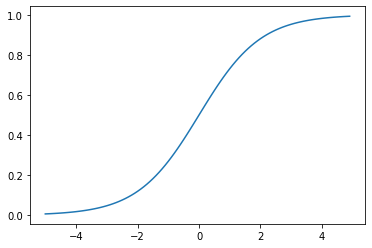

In [61]:
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

- saturates
- leads to
    - gradient becoming zero (vanishing gradient problem)
    - diverging to overflowing floating point value (exploding gradient problem)
- rare to see use in neural nets except at output where squashing allows one to interpret output as probabilities

<h3>Tanh</h3>

- cosmetically different variant of sigmoid
- mathematical expression: tanh(x) = (e^x-e^-x)/(e^x+e^-x)
- tanh is linear transform of sigmoid function
- also "squashing" function
- maps from real numbers to -1 to 1

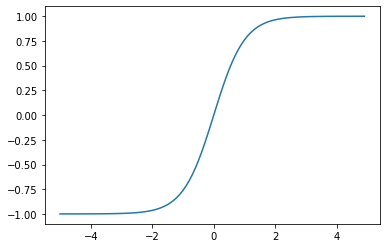

In [62]:
x = torch.arange(-5., 5., .1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

<h3>ReLU</h3>

- Rectified Linear Unit
- arguably most import activation function
- mathematical expression: f(x) = max(0, x)

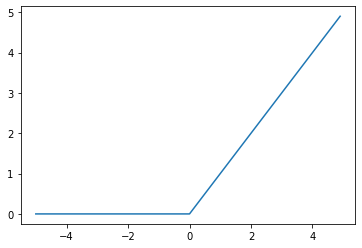

In [63]:
relu = torch.nn.ReLU()
x = torch.arange(-5.,5.,.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

- fixes the vanishing gradient problem but but trade off is the "dying ReLU"
    - certain output become zero and never revive
- to mitigate, leaky ReLU and Parametrix ReLU (PReLU) have been proposed
    - leaked coefficient is learned
- f(x) = max(x, ax)

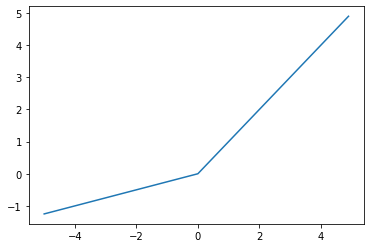

In [64]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., .1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

<h3>Softmax</h3>

- squashes unit output from 0 to 1
- also divides each output by sum of all output
- provides descrete probability distribution over k classes

<img src="images/3.6.png">

- resulting distribution sum up to one
- useful for classification output interpretation
- paired with probabilistic training objective (e.x. categorical cross entropy covered later)

In [65]:
import torch.nn as nn
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
describe(x_input)
print("")
describe(y_output)
print("")
describe(torch.sum(y_output, dim=1))

Type: torch.FloatTensor
Shape/size: torch.Size([1, 3])
Values: 
tensor([[ 0.9467, -0.5813, -0.0360]])

Type: torch.FloatTensor
Shape/size: torch.Size([1, 3])
Values: 
tensor([[0.6284, 0.1363, 0.2352]])

Type: torch.FloatTensor
Shape/size: torch.Size([1])
Values: 
tensor([1.0000])


<h2>Loss Functions</h2>

- guides training algo to pick parameters suing data
- provides score using prediction and truth
- higher score equals worse prediction
- commonly used below

<h3>Mean Squared Error Loss</h3>

- regression problems where target and output are continuous

<img src="images/MSE.png">

- average of squared differences
- other common regression loss functions
    - mean absolute error, root mean squared error
- all involve computing a real value difference between target and output

In [66]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.0400, grad_fn=<MseLossBackward>)


<h3>Categorical Cross - Entropy Loss</h3>

- typical usage: multiclass classification where output is class membership probabilities
- target is vector of n elements
    - represents true multinomial distribution over all classes
    - vector is one hot if only one true class
- output is also size n
    - models guess of distribution

<img src="images/CCEL.png">

- method to compute distribution difference
- float specific considerations for computing loss
    - limit of float size
    - large negative/postive in softmax is amplified
    - network output is the layer before softmax
    - log in cross_entropy inverses exponential
- allows for softmax at final output to be used with cross-entropy to optimize

In [68]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch. tensor([1, 0 ,3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(3.0668, grad_fn=<NllLossBackward>)


<h3>Binary Cross-Entropy Loss</h3>

- between two classes
- BCE

In [78]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.0773],
        [0.7049],
        [0.5438],
        [0.5049]], grad_fn=<SigmoidBackward>)
tensor(1.2730, grad_fn=<BinaryCrossEntropyBackward>)


<h2>Diving Deep into Supervised Training</h2>

- supervised learning:
    - map observations to targets given labeled examples
- use model predictions & loss function for gradient-based optimization on model parameters
- supervised learning requires:
    - model
        - computes prediction from observations
    - loss function
        - measures error of predictions to target
    - training data
        - observeration, target pairs
    - optimization algorithm
        - adjusts model's parameters to minimize the loss
- classic toy problem:
    - 2d points into two classes
    - basically finding a boundary

<h3>Constructing Toy Data</h3>

- common practice:
    - create synthetic data with understood properties to understand algorithms
- sample points from two parts of x - y plane creating easy to learn situation for model

<img src='images/3.2.png'>

<h4>Choosing a model</h4>

- perceptron:
    - allows any input size
        - input size generally determined by task and data
    - input size is 2
        - constructed data is in 2d plane
    - numeric indices to classes: 0 & 1
        - doesn't matter if circle is 0 or 1 and star is 0 or 1 as long as consistency kept
    - perceptron activation function is sigmoid
        - perceptron output is probability of datapoint being class 1
        - P(y = 1|x)

<h4>Converting the probabilities to discrete classes</h4>

- impose decision boundary sigma
- if P(Y=1|x) > sigma x is 1 else x is 0
- typically boundary set to 0.5 but this hyperparameter is tuned to achieve desired precision in classification

<h4>Choosing loss function</h4>

- since situation is model ouput is probability cross entropy based loss is most appropriate
- binary classification -> BCE loss

<h4>Choosing an optimizer</h4>

- optimizer updates wieghts of model using error signal
- learning rate: hyperparameter that controls update behaviour of optimizer
    - large learning rate
        - causes bigger changes to parameter
        - affects convergence
    - small learning rate
        - very little progress during training
    - use default before tuning
        - unless research paper says otherwise
- Stochastic gradient descent is classic algorithm
    - difficult optimization problems causes SGD to have convergence issues
- preffered alternative:
    - adaptive optimizers such as Adagrad/Adam
        - Adam default learning rate = 0.001

In [79]:
import torch.optim as optim

input_dim = 2
lr=0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

<h4>Putting it Together: Gradient-Based Supervised Learning</h4>

- forward pass for loss to see how far off current model is
- gradient of loss ecomes signal for magnitude parameters should change
- gradient for each parameter represents instantaneous rate of change in loss value given the parameter
    - parameter's contribution to loss funciton
- each parameter on own hill and wants to go down
- iterative updating of each parameter with gradient of loss with respect to parameter

- Gradient - stepping algo
    - bookkeeping info such as gradients in model object cleared using zero_grad()
    - computes output with input data (x_data -> y_pred)
    - loss computed using prediction and target (loss(y_pred, y_target))
    - pytorch loss object (criterion) has function backward()
        - iteratively propagates loss backward through computational graph and notifies each parameter of its gradient
    - optimizer instructs parameters how to update values knowing gradient with step() function
- training dataset partitioned into batches
- each iteration of gradient step performed on one data batch
- hyperparameter named batch_size
- training dataset is fixed ths larger batch size decreases number of batches
- certain number of batches is an epoch (typically number of batches to go through entire dataset)
- models are trained certain number of epochs
- methods for determining how many epochs

example 3-11

In [80]:
# each epoch is complete pass over train data
for epoch_i in range(n_epochs):
    
    # Step 0: Get Data
    x_data, y_data = get_toy_data(batch_size)
    
    # Step 1: Clear the gradients
    perceptron.zero_grad()
    
    # Step 2: Compute the forward pass of the model
    y_pred = perceptron(x_data, apply_sigmoid=True)
    
    # Step 3: Compute the loss value that we wish to optimize
    loss = bce_loss(y_pred, y_target)
    
    # step 4 Propagate the loss signal backward
    loss.backward()
    
    # Step 5: Trigger the optimizer to perform one update
    optimizer.step()

NameError: name 'n_epochs' is not defined

<h2>Auxiliary Training Concepts</h2>

- Core idea of supervised gradient-based learning:
    - define model
    - compute outputs
    - use loss to compute gradients
    - apply optimizer to update model parameters with gradient
- following is important auxiliary concepts

<h3>Correctly Measuring Model Performance: Evaluation Metrics</h3>

- most important non core concept
- objective performance measure on data model has never seen
- most common is accuracy:
    - fraction of predictions correct on data not seen during training

<h3>Correctly Measuring Model Performance: Dataset Split</h3>

- goal is to always generalize well to true distribution of data
- there exists distribution of data globally assuming we can see infinite amount of data
    - true/unseen distribution
- finite distribution that approximates incomplete picture of true distribution
- better generalization:
    - reduces error on samples in training AND samples from unseen distribution
- careful of model adapting to idiosyncrasies (overfitting)

- standard practices: 
    - split dataset into three randomly sampled partitions
        - training, validation, test
        - simpler method
        - single computation
        - make sure distribution of classes remain same between each three split
            - aggregate dataset by class label then random split each set separated by class label
        - common split ratio
            - 70% training
            - 15% validation
            - 15% testing
    - k-fold cross validation
        - split entire dataset into k equally sized 'folds'
        - 1 fold reserved for evaluation and the ramining used for training
        - iteratively repeated with different fold as evaluation
        - obtain k accuracy values
        - final accuracy is average with standard deviation
        - computationally expensive but necessary for smaller datasets
            - helps avoid when test data has harder/easir examples
- predefined training, validation and test split may exiust: common in benchmarking tasks
    - training data: update model parameters
    - validation data: measuring model performance at end of every epoch
    - test data: after all modeling choices explored and final results needed
        - super important to avoid bias

<h3>Knowing when to stop training</h3>

- simplest approach: fixed epoch training
    - arbitrary and unnecessary
- correctly measuring model performance helps determine when to stop training
- common method is to use a heuristic called 'early stopping'
    - keeps track of performance on validation dataset, epoch to epoch
    - performance does not improve -> training terminates
    - patience: number of epochs it waits before termination
    - model convergence: model stops improving on some dataset
        - rarely wait for model to completely converge
            - b/c time consuming & can lead to overfitting

<h3>Finding right Hyperparameters</h3>

- parameter
    - takes real values adjusted by optimizer with respect to fixed subset of training data called minibatch
- hyperparameter
    - model setting that affects
        - number of parameters
        - values taken by parameters
    - e.g. loss function, optimizer, learning rates for optimizer, layer size, patience for early stopping, regularization decisions
    - decisions have large effect on model convergence and performance

<h3>Regularization</h3>

- comes from numerical optimization theory
- ml algorithms optimize loss function to find most likely values of parameters
- there could be multiple solutions
- consider the image

<img src='images/3.3.png'>

- occam's razor: simpler explanation is more likely
- smoothness constraint is called L2 Regularization
- controlled by weight_decay parameter in optimizer
    - larger wegiht_decay value -> more likely optimizer will select smoother explanation
- L1 regularization also popular
    - encourages sparser solutions
    - model parameter values closer to zero
- chapter 4 looks at dropout
    - structural regularization technique
- active research area
- pytorch flexible for implementing custom regularizers

<h2>Example: Classifying Sentiment of Restaurant Reviews</h2>

- classify whether restaurant reviews on Yelp are positive or negative using a perceptron and supervised training
- Dataset
    - Yelp dataset
        - pairs reviews with sentiment label
            - positive or negative
- three assisting classes
    - Vocabulary
        - token to integer mappings
        - also maps class labels to integers
    - Vectorizer
        - encapsulates vocabularies
        - responsible for ingesting string data
        - e.g. review's text -> numerical vectors
    - DataLoader
        - groups and collates individual vectorized data into minibatches

<h3>The Yelp Review Dataset</h3>

- 2015 Yelp Contest: predict rating of restaurant given a review
    - Zhang, Zhao, and Lecun (2015) simpliefied dataset
        - converted 1 star and 2 star to negative
        - 3 and 4 star are positive
    - 560 000 training samples / 38 000 testing samples
- use simplified yelp dataset

- dataset difference, we select only 10% of training samples as full dataset
    - training - testing loop fast so we can experiment more quickly
    - model has lower accuracy
        - not major issue since we can retrain entire datset using knowledge gained from smaller subset

- from smaller subset, tri partition data: training, validation, testing
- if model decisions are based on held out portion model will be biased towards held out data
    - training partition derives model parameters
    - validation partition selects among hyperparameters
    - testing is only for final model evaluation
- Example 3-12: splits dataset
- Notes
    - seed set to a static number
    - aggregate by class label to gurantee class distribution remains same